In [1]:
import numpy as np  
import pandas as pd 

In [2]:
import nltk

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHUBHAM\AppData\Roaming\nltk_data...


True

In [6]:
quotes = pd.read_csv('quote_stash.csv')

In [7]:
quotes.shape

(108, 2)

In [8]:
quotes.head()

,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

all_compounds = []
for sentence in quotes['quote']:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()
        
        if k == 'compound':
            all_compounds.append(ss[k])

Pain is inevitable, but misery is optional.
compound: -0.802, 
neg: 0.59, 
neu: 0.41, 
pos: 0.0, 
To avoid criticism, do nothing, say nothing, be nothing.
compound: -0.6249, 
neg: 0.421, 
neu: 0.579, 
pos: 0.0, 
Believe and act as if it were impossible to fail.
compound: -0.5423, 
neg: 0.28, 
neu: 0.72, 
pos: 0.0, 
Never get out of the boat. Absolutely goddamn right. Unless you were goin' all the way.
compound: -0.5256, 
neg: 0.184, 
neu: 0.816, 
pos: 0.0, 
Nobody can make you feel inferior without your consent.
compound: -0.5213, 
neg: 0.384, 
neu: 0.616, 
pos: 0.0, 
What we fear doing most is usually what we most need to do.
compound: -0.4939, 
neg: 0.211, 
neu: 0.789, 
pos: 0.0, 
Everything you’ve ever wanted is on the other side of fear.
compound: -0.4939, 
neg: 0.242, 
neu: 0.758, 
pos: 0.0, 
Success is going from failure to failure without losing your enthusiasm.
compound: -0.4805, 
neg: 0.431, 
neu: 0.287, 
pos: 0.282, 
If there is no struggle, there is no progress.
compound: -0

[-0.802, -0.6249, -0.5423, -0.5256, -0.5213, -0.4939, -0.4939, -0.4805, -0.4404, -0.3612]
                                               quote             author  \
0        Pain is inevitable, but misery is optional.         Tim Hansel   
1  To avoid criticism, do nothing, say nothing, b...     Elbert Hubbard   
2  Believe and act as if it were impossible to fail.  Charles Kettering   
3  Never get out of the boat. Absolutely goddamn ...    Captain Willard   
4  Nobody can make you feel inferior without your...  Eleanor Roosevelt   

   sentiment_score  
0          -0.8020  
1          -0.6249  
2          -0.5423  
3          -0.5256  
4          -0.5213  


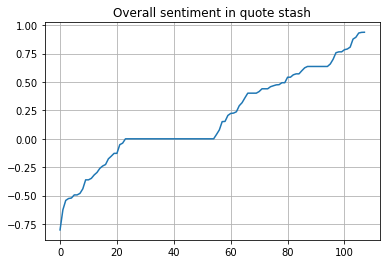

In [12]:
print(all_compounds[0:10])

import matplotlib
import matplotlib.pyplot as plt
plt.plot(sorted(all_compounds))
plt.title('Overall sentiment in quote stash')
plt.grid()

quotes['sentiment_score'] = all_compounds
print(quotes.head())

In [13]:
quotes.head()

,quote,author,sentiment_score
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.8020
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard,-0.6249
2,Believe and act as if it were impossible to fail.,Charles Kettering,-0.5423
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard,-0.5256
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt,-0.5213


In [14]:
quotes['sentiment_score'].describe()

count    108.000000
mean       0.187099
std        0.404429
min       -0.802000
25%        0.000000
50%        0.000000
75%        0.542300
max        0.938200
Name: sentiment_score, dtype: float64

In [21]:
quotes['quote'][quotes['sentiment_score'] == quotes['sentiment_score'].max()]

107    When we are mindful, deeply in touch with the ...
Name: quote, dtype: object

In [24]:
quotes[quotes['sentiment_score'] == quotes['sentiment_score'].max()]['quote'].values

array(['When we are mindful, deeply in touch with the present moment, our understanding of what is going on deepens, and we begin to be filled with acceptance, joy, peace and love.'],
      dtype=object)

In [23]:
quotes[quotes['sentiment_score'] == quotes['sentiment_score'].min()]

,quote,author,sentiment_score
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.802


In [26]:
from random import randrange

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# declare global variable
quotes = None

def prepare_sentiment_quote_stash(quote_stash_path):
    global quotes
    
    # load the quote stash
    quotes = pd.read_csv(quote_stash_path)
    
    sid = SentimentIntensityAnalyzer()
    
    all_compounds = []
    for sentence in quotes['quote']:
        ss = sid.polarity_scores(sentence)
        for k in sorted(ss):
            if k == 'compound':
                all_compounds.append(ss[k])
                
    
    # add sentiment to the data
    quotes['sentiment_score'] = all_compounds
    
    # create ladder index
    quotes = quotes.sort_values('sentiment_score')
    quotes['index'] = [ix for ix in range(0, len(quotes))] 
    
    return quotes
     
    
    
    
prepare_sentiment_quote_stash('quote_stash.csv')
quotes.head()

,quote,author,sentiment_score,index
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.8020,0
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard,-0.6249,1
2,Believe and act as if it were impossible to fail.,Charles Kettering,-0.5423,2
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard,-0.5256,3
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt,-0.5213,4


In [27]:
max_index_value = np.max(quotes['index'].values)

def gimme_a_quote(direction = None, current_index = None):
    rand_index = randrange(max_index_value)
    darker = None
    brighter = None
    
    
    # New session visit
    if current_index is None:
        brighter = rand_index
        
    if direction == 'brighter':
        brighter = current_index
    else:
        darker = current_index
         
    if darker is not None:
        current_index = rand_index

        try:
            current_index = int(darker)
        except ValueError:
            # somebody is gaming the system
            current_index = rand_index

            
        if current_index > 0:
            # try for a lesser value than current one
            rand_index = randrange(0, current_index)
            print('darker')
        else:
            # already at lowest point so assign a new random of full set
            rand_index = rand_index


    elif brighter is not None:

        try:
            current_index = int(brighter)
        except ValueError:
            # somebody is gaming the system
            current_index = rand_index

        # try for a higher value than current one
        if current_index < max_index_value -1:
            rand_index = randrange(current_index, max_index_value)
            print('brighter')
        else:
            # already at highest point so assign a new random of full set
            rand_index = rand_index

    else:
        # grab a random value
        rand_index = rand_index
        
    return (rand_index)
        

gimme_a_quote('brighter', 20)  

brighter


93

In [1]:
from flask import Flask, render_template, request, url_for, Markup
import os
import pandas as pd
import numpy as np
from random import randrange

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

app = Flask(__name__)

# load quotes in memory
BASE_DIR = os.path.dirname(os.path.abspath(__file__))

# declare global variable
quotes = None


@app.before_request
def prepare_sentiment_quote_stash():
    global quotes

    # load the quote stash
    quotes = pd.read_csv(os.path.join(BASE_DIR, 'quotes.csv'))

    sid = SentimentIntensityAnalyzer()

    all_compounds = []
    for sentence in quotes['quote']:
        ss = sid.polarity_scores(sentence)
        for k in sorted(ss):
            if k == 'compound':
                all_compounds.append(ss[k])


    # add sentiment to the data
    quotes['sentiment_score'] = all_compounds

    # create ladder index
    quotes = quotes.sort_values('sentiment_score')
    quotes['index'] = [ix for ix in range(0, len(quotes))]



def gimme_a_quote(direction = None, current_index = None, max_index_value = 0):
    rand_index = randrange(max_index_value)
    darker = None
    brighter = None


    # New session visit
    if current_index is None:
        brighter = rand_index

    if direction == 'brighter':
        brighter = current_index
    else:
        darker = current_index

    if darker is not None:
        try:
            current_index = int(darker)
        except ValueError:
            # somebody is gaming the system
            current_index = rand_index


        if current_index > 0:
            # try for a lesser value than current one
            rand_index = randrange(0, current_index)
        else:
            # already at lowest point so assign a new random of full set
            rand_index = rand_index


    elif brighter is not None:
        try:
            current_index = int(brighter)
        except ValueError:
            # somebody is gaming the system
            current_index = rand_index

        # try for a higher value than current one
        if current_index < max_index_value -1:
            rand_index = randrange(current_index, max_index_value)
        else:
            # already at highest point so assign a new random of full set
            rand_index = rand_index
    else:
        # grab a random value
        rand_index = rand_index

    return (rand_index)


@app.route("/")
def quote_me():
    quote_stash_tmp = quotes.copy()
    max_index_value = np.max(quote_stash_tmp['index'].values)
    rand_index_value = randrange(max_index_value)

    darker = request.args.get("darker")
    brighter = request.args.get("brighter")

    if darker is not None:

        try:
        	current_index = int(darker)
        except ValueError:
            # somebody is gaming the system
            current_index = randrange(max_index_value)

        new_index = gimme_a_quote(direction =  'darker', current_index = current_index, max_index_value = max_index_value)

    elif brighter is not None:

        try:
            current_index = int(brighter)
        except ValueError:
            # somebody is gaming the system
            current_index = rand_index_value

        new_index = gimme_a_quote(direction =  'brighter', current_index = current_index, max_index_value = max_index_value)


    else:
    	# grab a random value
    	new_index = randrange(max_index_value)

    random_quote = quote_stash_tmp.iloc[new_index]


    # get a random integer between 0 and max_index_value
    quote=random_quote['quote']
    author = random_quote['author']
    current_id =  random_quote['index']

    return render_template("quote.html",
        quote=quote,
        author=author,
        current_id=current_id,)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHUBHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


NameError: name '__file__' is not defined

In [ ]:
<!DOCTYPE html>
<html>
<title>W3.CSS Template</title>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">

<link href='https://fonts.googleapis.com/css?family=Merienda+One' rel='stylesheet' type='text/css'>


<style>
body,h1,h2,h3,h4,h5,h6 {font-family: "Raleway", Arial, Helvetica, sans-serif}
.myLink {display: none}


	.Merienda_One { font-family: "Merienda One"; font-size: 30px; font-style: normal; font-variant: normal; font-weight: 300; line-height: 26.4px; }

div.quote {

	padding-top: 20px;
	padding-right: 20px;
	padding-left: 20px;
}

#footer {
  position: absolute;
  bottom: 0;
  width: 100%;
  height: 6.5rem;            /* Footer height */
}

</STYLE>



<BODY  bgcolor="#fef4e2">
	<!-- https://www.w3schools.com/w3css/tryw3css_templates_travel2.htm# -->




	<!-- Navigation Bar -->
	<div class="w3-bar w3-border-bottom w3-xlarge w3-center"
				style="width:100%; background-color:#406b86;">


     <img src='static/images/inspire-header-me.png' style="height:100px" />
	  			</a>
	</div>

	<div id="quote" class="quote">
		<div class="Merienda_One">
			{{quote}}<BR><BR><BR>― {{author}}
		</div>
	</div>


<footer class="w3-container w3-center w3-margin-bottom"  id="footer" >
	<div class="w3-container w3-center">
		<form id='myform' action="{{ url_for('quote_me') }}" method='GET'>
			<button class="w3-button" type="submit" name='darker' id="darker" value='{{current_id}}'>
				<img src='static/images/moon.png'  style="width:50px" />
			</button>
			<img src='static/images/hand.png' id='hand' style="width:100px" />
			<button class="w3-button" name='brighter' id="brighter" type="submit" value='{{current_id}}'>
				<img src='static/images/sun.png'  style="width:50px" />
			</button>
		</form>
	</div>
</footer>

<SCRIPT type="text/javascript">

    // credit: http://www.javascriptkit.com/javatutors/touchevents2.shtml
    // https://codepen.io/ganmahmud/pen/RaoKZa
    function swipedetect(el, callback){

        var touchsurface = el,
        swipedir,
        startX,
        startY,
        distX,
        distY,
        threshold = 150, //required min distance traveled to be considered swipe
        restraint = 100, // maximum distance allowed at the same time in perpendicular direction
        allowedTime = 300, // maximum time allowed to travel that distance
        elapsedTime,
        startTime,
        handleswipe = callback || function(swipedir){}

        touchsurface.addEventListener('touchstart', function(e){
            var touchobj = e.changedTouches[0]
            swipedir = 'none'
            dist = 0
            startX = touchobj.pageX
            startY = touchobj.pageY
            startTime = new Date().getTime() // record time when finger first makes contact with surface
            e.preventDefault()
        }, false)

        touchsurface.addEventListener('touchmove', function(e){
            e.preventDefault() // prevent scrolling when inside DIV
        }, false)

        touchsurface.addEventListener('touchend', function(e){
            var touchobj = e.changedTouches[0]
            distX = touchobj.pageX - startX // get horizontal dist traveled by finger while in contact with surface
            distY = touchobj.pageY - startY // get vertical dist traveled by finger while in contact with surface
            elapsedTime = new Date().getTime() - startTime // get time elapsed
            if (elapsedTime <= allowedTime){ // first condition for awipe met
                if (Math.abs(distX) >= threshold && Math.abs(distY) <= restraint){ // 2nd condition for horizontal swipe met
                    swipedir = (distX < 0)? 'left' : 'right' // if dist traveled is negative, it indicates left swipe
                }
                else if (Math.abs(distY) >= threshold && Math.abs(distX) <= restraint){ // 2nd condition for vertical swipe met
                    swipedir = (distY < 0)? 'up' : 'down' // if dist traveled is negative, it indicates up swipe
                }
            }
            handleswipe(swipedir)
            e.preventDefault()
        }, false)
    }

    //USAGE:
    var el = document.getElementById('quote');
    swipedetect(el, function(swipedir){
        // swipedir contains either "none", "left", "right", "top", or "down"
        if (swipedir == "right") {
            document.getElementById("brighter").click();
        }
        else if  (swipedir == "left")  {
            document.getElementById("darker").click();
        }
    });

    var hand = document.getElementById('hand');
    swipedetect(hand, function(swipedir){
        // swipedir contains either "none", "left", "right", "top", or "down"
        if (swipedir == "right") {
            document.getElementById("brighter").click();
        }
        else if  (swipedir == "left")  {
            document.getElementById("darker").click();
        }
    });

</SCRIPT>

</BODY>


</HTML>